In [438]:
#import the needed librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import os
import matplotlib.pyplot as plt  # Matlab-style plotting
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
color = sns.color_palette()
from scipy import stats


import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

### Read the data from File

In [483]:
os.chdir('F:\MSBAPM\Python\Project\HR dataset2')
hr_df = pd.read_csv('HR_comma_sep.csv')

hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [484]:
## To check for the size of the products
hr_df.head()
print("The hr data size is : ", hr_df.shape)

## to find the uniqueness of values in each column
Department_unique = len(set(hr_df.sales))
print("The unique records are:",Department_unique)

The hr data size is :  (14999, 10)
The unique records are: 10


In [485]:
## Unique records
set((hr_df.sales))

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [486]:
#To check for null values and missing values
missing_val = hr_df.isnull().sum().sort_values(ascending=False)
missing_val

salary                   0
sales                    0
promotion_last_5years    0
left                     0
Work_accident            0
time_spend_company       0
average_montly_hours     0
number_project           0
last_evaluation          0
satisfaction_level       0
dtype: int64

In [370]:
set((hr_df.salary))

{'high', 'low', 'medium'}

In [490]:
# Renaming certain columns for easy understanding
hr_df = hr_df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        })

## Replace target variable  
Employee_has_left = hr_df['left']
hr_df['Employee_has_left'] = Employee_has_left.values
hr_df = hr_df.drop(['left'],axis=1)

In [491]:
hr_df.head()

,satisfaction,last_evaluation,number_project,average_montly_hours,yearsAtCompany,workAccident,promotion,department,salary,Employee_has_left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


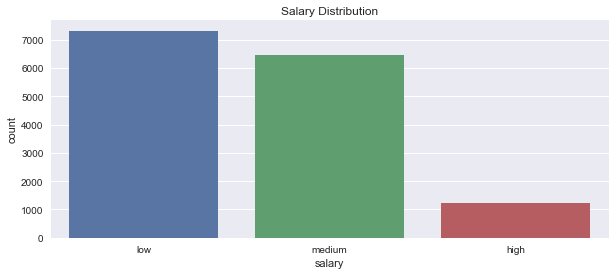

In [74]:
# salary per Department
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x="salary",data=hr_df).set_title('Salary Distribution');

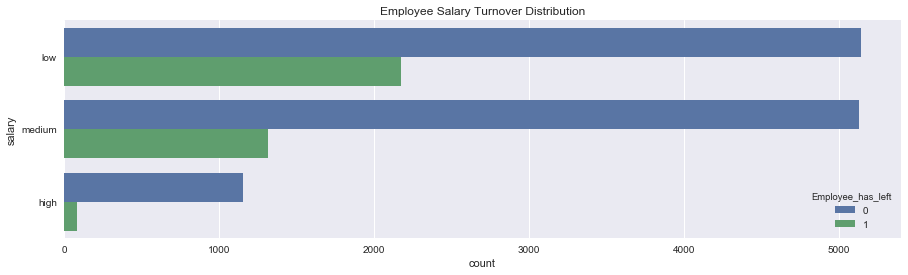

In [75]:
# Turnover rate wrt salary
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='Employee_has_left', data=hr_df).set_title('Employee Salary Turnover Distribution');

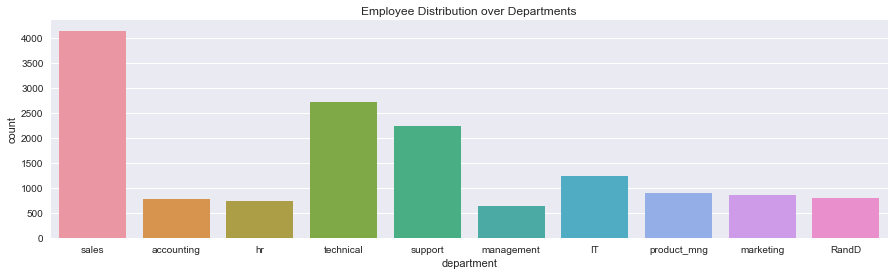

In [76]:
# Number of employees per Department
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="department",data=hr_df).set_title('Employee Distribution over Departments');

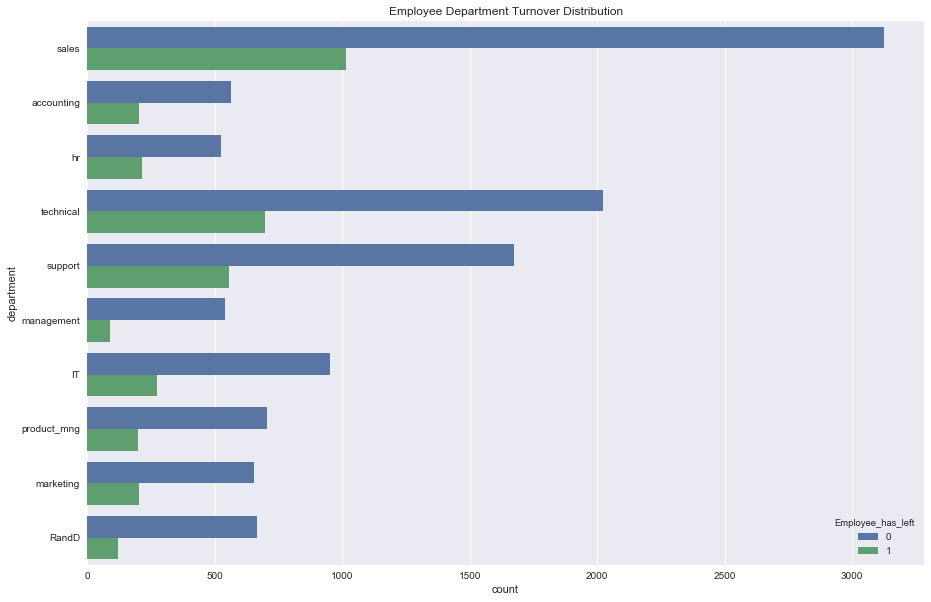

In [77]:
# Turnover rate wrt department
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="department", hue='Employee_has_left', data=hr_df).set_title('Employee Department Turnover Distribution');

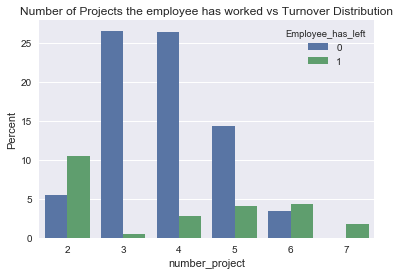

In [79]:
# Number of Projects Employee has worked vs Turnover
ax = sns.barplot(x="number_project", y="number_project", hue="Employee_has_left", data=hr_df, estimator=lambda x: len(x) / len(hr_df) * 100)
ax.set_title('Number of Projects the employee has worked vs Turnover Distribution');
ax.set(ylabel="Percent")

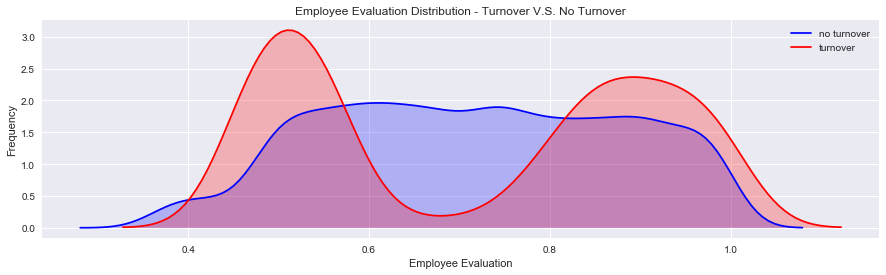

In [80]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr_df.loc[(hr_df['Employee_has_left'] == 0),'last_evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(hr_df.loc[(hr_df['Employee_has_left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

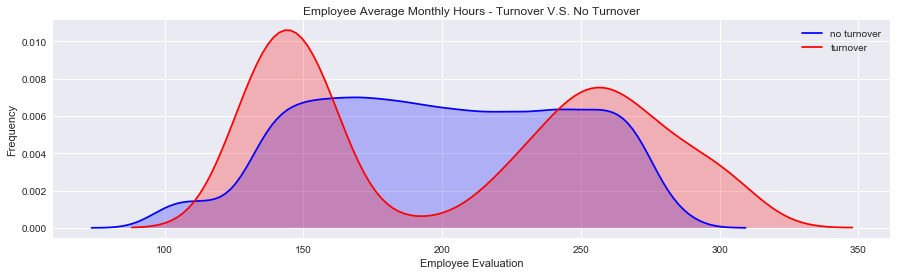

In [81]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr_df.loc[(hr_df['Employee_has_left'] == 0),'average_montly_hours'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(hr_df.loc[(hr_df['Employee_has_left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Average Monthly Hours - Turnover V.S. No Turnover')

In [82]:
obj_df = hr_df.select_dtypes(include=['object']).copy()
obj_df.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [83]:
cleanup_nums = {"salary":{"low": 0, "medium": 1,"high":2},
                "sales": {"IT":0,
                         "RandD":1,
                         "accounting":2,
                         "hr":3,
                         "management":4,
                         "marketing":5,
                         "product_mng":6,
                         "sales":7,
                         "support":8,
                         "technical" :9}}


In [84]:
hr_df.replace(cleanup_nums, inplace=True)
hr_df.head()

,satisfaction,last_evaluation,number_project,average_montly_hours,yearsAtCompany,workAccident,promotion,department,salary,Employee_has_left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1
4,0.37,0.52,2,159,3,0,0,sales,0,1


In [85]:
hr_df.dtypes

satisfaction            float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
yearsAtCompany            int64
workAccident              int64
promotion                 int64
department               object
salary                    int64
Employee_has_left         int64
dtype: object

### Statistical Overview

In [87]:
summary_stats = hr_df.describe()
summary_stats

,satisfaction,last_evaluation,number_project,average_montly_hours,yearsAtCompany,workAccident,promotion,salary,Employee_has_left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000


In [443]:
median = hr_df.median()
kurtosis = hr_df.kurtosis()
skewness = hr_df.skew()
covariance = (hr_df.std()/hr_df.mean())*100

In [446]:
summary_stats.loc['median'] = median
summary_stats.loc['kurtosis'] = kurtosis
summary_stats.loc['skewness'] = skewness
summary_stats.loc['Covariance'] = covariance
summary_stats

,satisfaction,last_evaluation,number_project,average_montly_hours,yearsAtCompany,workAccident,promotion,salary,Employee_has_left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,NaN,0.000000
kurtosis,-0.670859,-1.239040,-0.495478,-1.134982,4.773211,2.085320,42.054957,NaN,-0.487060


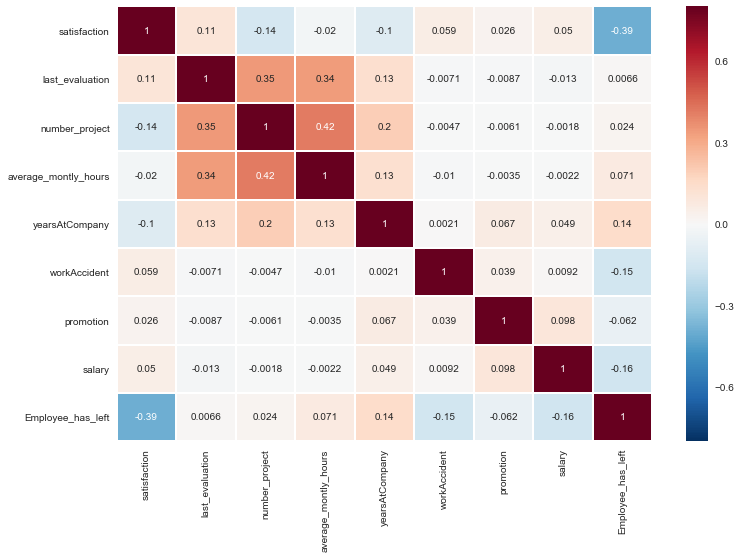

In [94]:
## Correlation of Variables
#Correlation Matrix
import matplotlib.pyplot as pl
import pandas
ax = pl.subplots(figsize=(12, 8))
corr = hr_df.corr()
corr=(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot= True,
            linewidths=.8,
            vmin= -0.4, vmax=0.8)

#corr

## Feature Selection

In [488]:
## To encode the categorical variables to numerical values
lb = LabelEncoder()

In [493]:
hr_df['department_enc'] = lb.fit_transform(hr_df['department'].values)
hr_df['salary_enc'] = lb.fit_transform(hr_df['salary'].values)
## Code to verify which columns are most importance for prediction
X = hr_df.drop(['Employee_has_left','salary','department'],axis=1)
Y = hr_df.Employee_has_left
#hr_df.Employee_has_left.value_counts()

In [494]:
## Running a decision tree model
#Import Library
from sklearn import tree
from sklearn.metrics import roc_auc_score

In [495]:
# model = tree.DecisionTreeRegressor() for regression 
decision = tree.DecisionTreeClassifier() 
decision.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [496]:
#Predict Output
y_predict= decision.predict(X)

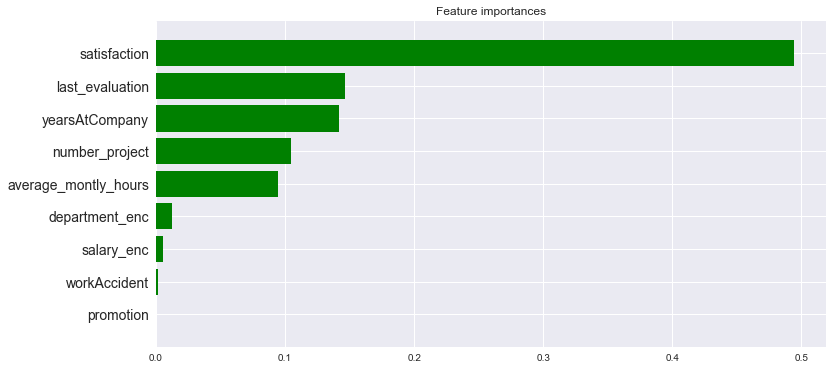

In [497]:
## plot the importances ##
importances =decision.feature_importances_
feat_names = X.columns


indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color='green',  align="center")
plt.yticks(range(len(indices)), feat_names[indices],fontsize=14)
plt.ylim([-1, len(indices)])
plt.show()

## Model Building

In [503]:
X.columns

Index(['satisfaction', 'last_evaluation', 'number_project',
       'average_montly_hours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department_enc', 'salary_enc'],
      dtype='object')

In [499]:
Feature_cols = ['satisfaction', 'last_evaluation', 'yearsAtCompany', 'number_project','average_montly_hours','department_enc','salary_enc','workAccident']

In [502]:
X1 = X[Feature_cols]
Y1 = hr_df.Employee_has_left

### Cross Validation Data Split - Training, Validation

In [504]:
# Cross Validation

#Import Library
from sklearn import tree
from sklearn.metrics import roc_auc_score
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size = 0.3,random_state=0)

### Logistic Model

In [548]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate model
logreg = LogisticRegression(random_state = 0,class_weight='balanced')
# fit model
logreg.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [549]:
y1_pred_log = logreg.predict(X1_test)

In [550]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y1_test, y1_pred_log))

0.750133333333


In [559]:
#Calculating AUC score
from sklearn.metrics import roc_curve, auc
log_res = logreg.predict_proba(X1_test)
log_auc_roc=roc_auc_score(y1_test,log_res[:,1])
log_auc_roc

0.81728630378229017

In [558]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, y1_pred_log),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

,Predicted 0,Predicted 1
True 0,2112,769
True 1,168,701


### Classification Report

In [516]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_log))

             precision    recall  f1-score   support

          0       0.93      0.73      0.82      2881
          1       0.48      0.81      0.60       869

avg / total       0.82      0.75      0.77      3750



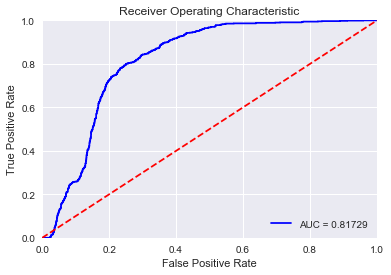

In [576]:
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y1_test,log_res[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### To calculate the threshold cut-off value based on tpr and fpr

In [575]:
####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

[]

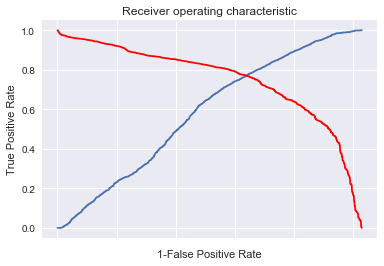

In [581]:
fpr, tpr, threshold = metrics.roc_curve(y1_test,log_res[:,1])
roc_auc = metrics.auc(fpr, tpr)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [582]:
roc.ix[(roc.tf-0).abs().argsort()[:1]]

,1-fpr,fpr,tf,thresholds,tpr
639,0.770219,0.229781,-0.000368,0.544376,0.76985


In [566]:
thresh = roc.ix[(roc.tf-0).abs().argsort()[:1]]
b = thresh.iloc[0,3]

In [567]:
b

0.54437576153028733

In [568]:
res1 = log_res[:,1]

In [570]:
res2 = []
for i in res1:
    if(i > b):
        res2.append(1)
    else: res2.append(0)
res2[:10]

[1, 1, 0, 0, 0, 1, 1, 0, 0, 1]

In [572]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, res2),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

,Predicted 0,Predicted 1
True 0,2220,661
True 1,200,669


In [ ]:
### To calculate the threshold cut-off value based on tpr and fpr

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

fpr, tpr, threshold = metrics.roc_curve(y1_test,log_res[:,1])
roc_auc = metrics.auc(fpr, tpr)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

thresh = roc.ix[(roc.tf-0).abs().argsort()[:1]]
b = thresh.iloc[0,3]

b

res1 = log_res[:,1]

res2 = []
for i in res1:
    if(i > b):
        res2.append(1)
    else: res2.append(0)
res2[:10]

#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, res2),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

### Naive Bayes Classifier

In [521]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X1_train, y1_train)
y1_pred_nb = nb.predict(X1_test)

# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y1_test, y1_pred_nb))

0.8528


In [522]:
## Calculating the AUC score
from sklearn.metrics import roc_auc_score
r = nb.predict_proba(X1_test)
r
nb_auc_roc= roc_auc_score(y1_test,r[:,1])
nb_auc_roc

0.86088491361801012

In [523]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, y1_pred_nb),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

,Predicted 0,Predicted 1
True 0,2600,281
True 1,271,598


In [524]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_nb))

             precision    recall  f1-score   support

          0       0.91      0.90      0.90      2881
          1       0.68      0.69      0.68       869

avg / total       0.85      0.85      0.85      3750



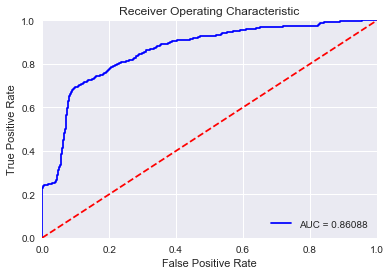

In [525]:
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y1_test,r[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree classifier

In [526]:
## Decision Tree Model

## Running a decision tree model

# Create tree object 
decision = tree.DecisionTreeClassifier(random_state = 0,class_weight = 'balanced') 
decision.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [527]:
#Predict Output
y_predict= decision.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, y_predict)

0.9768

In [528]:
#Calculating AUC score
from sklearn.metrics import roc_auc_score
r = decision.predict_proba(X1_test)
r
dec_auc_roc = roc_auc_score(y1_test,r[:,1])
dec_auc_roc

0.97485549744786382

In [529]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, y_predict),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

,Predicted 0,Predicted 1
True 0,2819,62
True 1,25,844


In [530]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_predict))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2881
          1       0.93      0.97      0.95       869

avg / total       0.98      0.98      0.98      3750



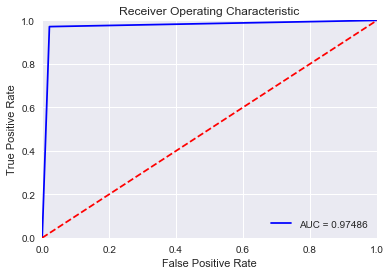

In [531]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y1_test,r[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### GBM

In [532]:
#Import Library
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0)

gradient = GradientBoostingClassifier()
gradient.fit(X1_train, y1_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [533]:
#roc_auc_score(y,obj[:,1])
y1_pred_grad = gradient.predict(X1_test)
from sklearn import metrics
print(metrics.accuracy_score(y1_test, y1_pred_grad))

0.9776


In [534]:
## Calculating the AUC score
from sklearn.metrics import roc_auc_score
r = gradient.predict_proba(X1_test)
r
gbm_auc_roc=roc_auc_score(y1_test,r[:,1])
gbm_auc_roc

0.98914318604211804

In [535]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, y1_pred_grad),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

,Predicted 0,Predicted 1
True 0,2851,30
True 1,54,815


In [536]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_grad))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2881
          1       0.96      0.94      0.95       869

avg / total       0.98      0.98      0.98      3750



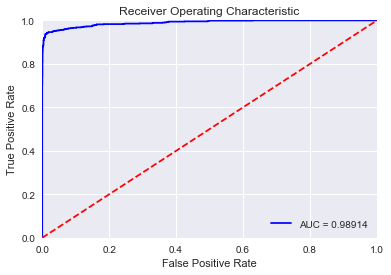

In [537]:
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y1_test,r[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [538]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [539]:
#predict
y1_pred_rf = rf.predict(X1_test)
y1_pred_rf

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [423]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y1_test, y1_pred_rf))

0.987466666667


In [540]:
## Calculating the AUC score
from sklearn.metrics import roc_auc_score
r = rf.predict_proba(X1_test)
r
rf_auc_roc=roc_auc_score(y1_test,r[:,1])
rf_auc_roc

0.99001094029411385

In [541]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y1_test, y1_pred_rf),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True 0', 'True 1']
)

,Predicted 0,Predicted 1
True 0,2872,9
True 1,41,828


In [542]:
## Classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_grad))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2881
          1       0.96      0.94      0.95       869

avg / total       0.98      0.98      0.98      3750



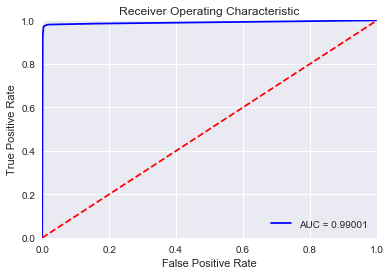

In [543]:
#ROC Curve
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y1_test,r[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [545]:
X1_test.head()
Prob_Prediction = r[:,1]
Prob_Prediction[:5]

array([ 1.,  0.,  0.,  0.,  0.])

In [546]:
pred= y1_pred_rf
Output = X1_test
Output['pred'] = pd.Series(pred, index=Output.index)
Output['target_variable'] = pd.Series(y1_test, index=Output.index)
Output['prob(0)'] = pd.Series(r[:,0], index=Output.index)
Output['prob(1)'] = pd.Series(r[:,1], index=Output.index)
X1_test.to_csv('rf_output_final.csv')

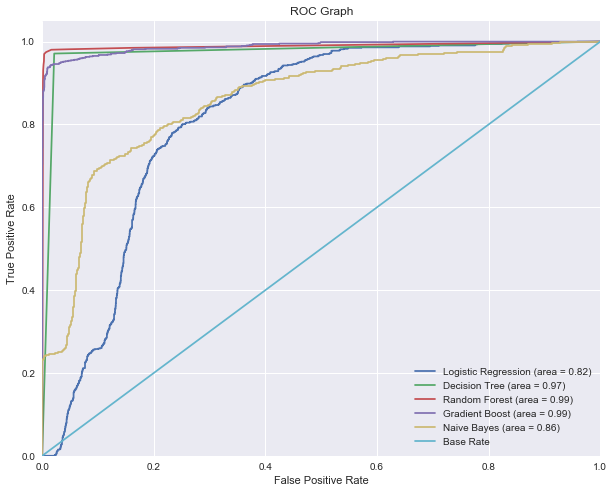

In [560]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
dec_fpr, dec_tpr, dec_thresholds = roc_curve(y1_test, decision.predict_proba(X1_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y1_test, rf.predict_proba(X1_test)[:,1])
gbm_fpr, gbm_tpr, gbm_thresholds = roc_curve(y1_test, gradient.predict_proba(X1_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y1_test, nb.predict_proba(X1_test)[:,1])

plt.figure(figsize=(10, 8))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_auc_roc)

# Plot Logistic Regression ROC
plt.plot(dec_fpr, dec_tpr, label='Decision Tree (area = %0.2f)' % dec_auc_roc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc_roc)

# Plot Decision Tree ROC
plt.plot(gbm_fpr, gbm_tpr, label='Gradient Boost (area = %0.2f)' % gbm_auc_roc)

# Plot AdaBoost ROC
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_auc_roc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()